In [1]:
import cv2
#from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [2]:
# pip install --upgrade opencv-python

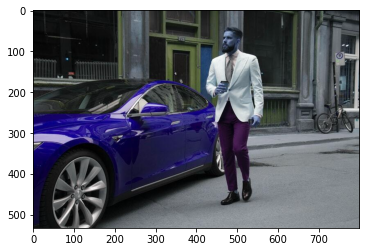

In [3]:
img = cv2.imread('car_person.jpg')
#cv2_imshow(img)
plt.imshow(img)


In [4]:
classNames = []
classFile = 'coco.names'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')
    


In [5]:
classNames[0]

'person'

In [6]:
configpath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightspath = 'frozen_inference_graph.pb'

In [7]:
net = cv2.dnn_DetectionModel(weightspath, configpath)

In [8]:
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5,127.5,127.5))
net.setInputSwapRB(True)

<dnn_Model 00000164E99A95F0>

In [9]:
confids, confs, bbox = net.detect(img, confThreshold=0.5)

In [10]:
print(confids, bbox, confs)

[3 1 2] [[  0 166 456 364]
 [425  52 142 423]
 [686 210 106  98]] [0.6784531 0.6704893 0.6124961]


In [11]:
for classid, confidence, box in zip(confids.flatten(), confs.flatten(), bbox):
    cv2.rectangle(img, box, color=(0,255,0),thickness=3)
    cv2.putText(img, classNames[classid-1],(box[0],box[1]+30), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

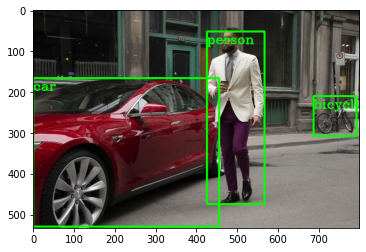

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
import cv2 

cap = cv2.VideoCapture(0)
framewidth = 640
frameheight = 480
cap.set(3,framewidth)
cap.set(4,frameheight)
cap.set(10,180)
cap.set(15,100)



while True:
    success, img = cap.read()
    
    if not success:
        break
    
    confids, confs, bbox = net.detect(img, confThreshold=0.5)
    if (len(confids)!=0):
        for classid, confidence, box in zip(confids.flatten(), confs.flatten(), bbox):
            cv2.rectangle(img, box, color=(0,255,0),thickness=3)
            cv2.putText(img, classNames[classid-1],(box[0]+10,box[1]+30), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
   
    
    cv2.imshow('result',img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    